# HW 1

## Exercise 2

__The true model__
<br>

$x \sim$ U(0,1), 
<br>

$y = 5x^2 + 0.1 \varepsilon$,
<br>

$\varepsilon \sim \mathcal{N}$(0,1)

__Linear regression__
<br>
We start with the true model
<br>

$y_i = \sum_{j=0}^n \beta_j X_{ij}^j+ \varepsilon_i $
<br>

The above can be written as a matrix vector equation
<br>

$\hat{y} = \hat{X} \hat{\beta} + \hat{\varepsilon}$
<br>

In our case $j = 0,1,2$.
<br>

The general form for $X$ is used below, since the form of $X$ does not change the results for the coefficients.

### The minimization problem

We find $\beta$ by finding the $\beta$ that minimizes a cost function $Q(\beta)$, which again equals the squared residuals
<br>

$\min Q(\beta) = \min \sum_i \varepsilon_i^2 = \min \sum_i (y_i - \sum_{j=0}^n \beta_j X_{ij})^2$ 
<br>

In matrix vector notation we get
<br>

$ \min Q(\hat{\beta}) = \min \hat{\varepsilon}^T \hat{\varepsilon} = \min (\hat{y} - \hat{X} \hat{\beta})^T (\hat{y} - \hat{X} \hat{\beta}).$
<br>
<br>

We find $\hat{\beta}$ by solving for $\beta_j$ first and than transform the solution to matrix vector form to get $\hat{\beta}$.
<br>

$0 = \partial_{\beta_j} \min \sum_i (y_i - \sum_{j=0}^n \beta_j X_{ij})^2 = -2  \sum_i X_{ij} (y_i - \sum_{j=0}^n \beta_j X_{ij})$
<br>

In matix vector notation we get
<br>

$0 = \hat{X}^T (\hat{y} - \hat{X} \hat{\beta}) $
<br>

$\hat{\beta} = (\hat{X}^T \hat{X})^{-1} \hat{X}^T \hat{y}$.

## Numerical solution with Numpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set(style="white", context="notebook", font_scale=1.5,
            rc={"axes.grid": True, "legend.frameon": False,
"lines.markeredgewidth": 1.4, "lines.markersize": 10})

In [2]:
# Data generation
x = np.random.rand(100, 1)
x = np.sort(x, 0)
epsilon = np.random.rand(100, 1)
y = 5*x**2 + .1*epsilon

In [3]:
# Fitting
XHat = np.c_[np.ones_like(x), x, x**2]
betaHat = np.linalg.inv(XHat.T.dot(XHat)).dot(XHat.T).dot(y)
yFitted = XHat.dot(betaHat)
print(betaHat)

[[ 0.05655559]
 [-0.02822868]
 [ 5.02614725]]


Coefficient values fits well with true model. Small coefficients for constant and linear term.

In [7]:
# New data
xNew = np.array([[0], [1]])
XHatNew = np.c_[np.ones_like(xNew), xNew, xNew**2]
yNew =  XHatNew.dot(betaHat)

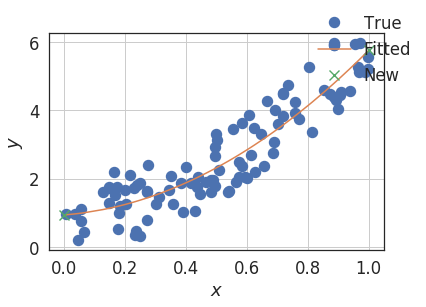

In [8]:
# Plotting
fig, ax = plt.subplots()
ax.plot(x, y, 'o',label='True')
ax.plot(x, yFitted, label='Fitted')
ax.plot(xNew, yNew, 'x', label='New')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
fig.legend()

Very good fit.

# Numerical solution with Scikit-learn

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error, mean_absolute_error

linreg = LinearRegression()
XHatSCL = np.c_[x, x**2] # Intercept not included in input for SCL
linreg.fit(XHatSCL, y)
print('Intercept: ', linreg.intercept_)
print('Coefficients: ', linreg.coef_)

Intercept:  [0.93685544]
Coefficients:  [[0.71498912 4.10180998]]


Coefficients identical to Numpy case.

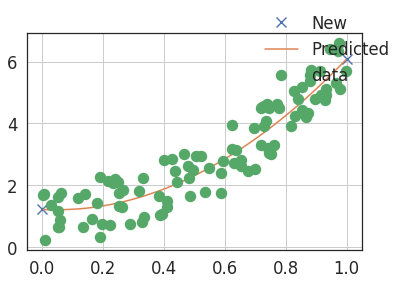

In [164]:
yPredictSCL = linreg.predict(XHatSCL)
XHatNewSCL = np.c_[xNew, xNew**2]
yNewSCL = linreg.predict(XHatNewSCL)

fig2, ax2 = plt.subplots()
ax2.plot(xNew, yNewSCL, 'x', label='New')
ax2.plot(x, yPredictSCL, label='Predicted')
ax2.plot(x, y, 'o', label='data')
fig2.legend()

Same as for Numpy.

In [165]:
print("Mean squared error: %.2f" % mean_squared_error(y, yPredictSCL))
print('Variance score: %.2f' % r2_score(y, yPredictSCL))

Mean squared error: 0.34
Variance score: 0.87


### Exercise 3

Given 
<br>

$\hat{\beta} = (\hat{X}^T \hat{X})^{-1} \hat{X}^T \hat{y}$
<br>

and 
<br>
$\varepsilon \sim \mathcal{N}$ (0,$\sigma^2$)
<br>

show
<br>

Var$(\hat{\beta}) = (\hat{X}^T \hat{X})^{-1} \sigma^2$.
<br>

### Solution
See notebook "E #1 4"


## MC for checking expression

In [92]:
from sklearn.linear_model import LinearRegression
import numpy as np

linreg = LinearRegression()
np.random.seed(1)
observationNumber = 100
x = np.random.rand(observationNumber, 1)
x = np.sort(x, 0)

XHatSCL = np.c_[x, x**2] # Intercept not included in input for SCL

simga2 = 0.1 # Should equal variance of epsilon, see https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randn.html

coeff = []

MCcycles = 1

for i in range(MCcycles):
    epsilon = np.random.rand(observationNumber, 1)
    y = 5*x**2 + simga2*epsilon
    linreg.fit(XHatSCL, y)
    coeff.append(linreg.coef_)   

print('coeffs', coeff, '\n')
    
yPredictSCL = linreg.predict(XHatSCL)    
predictionError2 = 1/(len(x) -1)*np.sum((y - yPredictSCL)**2)

coeff = np.concatenate(coeff)
coeff1, coeff2 = coeff[:,0], coeff[:,1]
varCoeff1, varCoeff2  = np.var(coeff1), np.var(coeff2)



print('Var coeff1:', varCoeff1)
print('Var coeff2:', varCoeff2)

XHat = np.c_[np.ones_like(x), x, x**2]
varExact = np.linalg.inv(XHat.T.dot(XHat)).dot(predictionError2)
print('\n, Exact expression: \n', varExact)

print('\n predictionError2: ', predictionError2, 'sigma2: ', simga2)

coeffs [array([[-0.06207572,  5.06346196]])] 

Var coeff1: 0.0
Var coeff2: 0.0

, Exact expression: 
 [[ 7.63253555e-05 -3.10080788e-04  2.60896093e-04]
 [-3.10080788e-04  1.75370738e-03 -1.67934168e-03]
 [ 2.60896093e-04 -1.67934168e-03  1.71978183e-03]]

 predictionError2:  0.000986806438763414 sigma2:  0.1


# HW 2
## 1
Write your own code for the Ridge method (see chapter 3.4 of Hastie et al., equations (3.43) and (3.44)) and compute the parametrization for different values of λ. Compare and analyze your results with those from exercise 2. Study the dependence on λ while also varying the strength of the noise in your expression for y(x).

SLR coefficientVariances 
 [[ 7.63253555e-05 -3.10080788e-04  2.60896093e-04]
 [-3.10080788e-04  1.75370738e-03 -1.67934168e-03]
 [ 2.60896093e-04 -1.67934168e-03  1.71978183e-03]] 


 lambda  0.0  
 Numpy Var(\Beta) = 
 [[ 7.63253555e-05 -3.10080788e-04  2.60896093e-04]
 [-3.10080788e-04  1.75370738e-03 -1.67934168e-03]
 [ 2.60896093e-04 -1.67934168e-03  1.71978183e-03]] 



NameError: name 'linear_model' is not defined

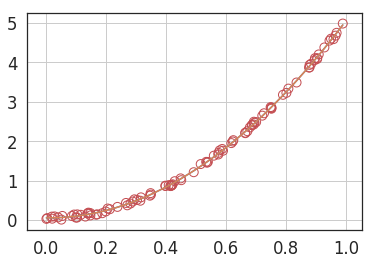

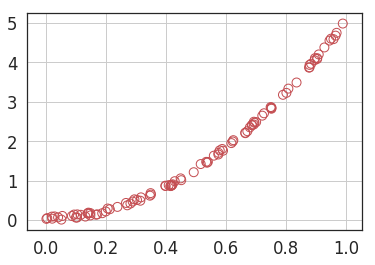

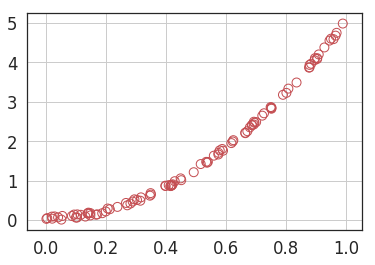

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error, mean_absolute_error
#from sklearn import linear_model
from sklearn.linear_model import Ridge

# Data generation
np.random.seed(1)
x = np.random.rand(100, 1)
x = np.sort(x, 0)
epsilon = np.random.rand(100, 1)
sigma2 = .1
y = 5*x**2 + sigma2*epsilon

class EsimatorQuadraticPolynomial:
    def __init__(self, x, y):
        self.x, self.y = x, y
        self.XHat = np.c_[np.ones_like(x), x, x**2]
        
    def slr(self):
        '''Standard linear regression'''
        x, y, XHat = self.x, self.y, self.XHat
        self.betaHat = np.linalg.inv(XHat.T.dot(XHat)).dot(XHat.T).dot(y)

        self.yFitted = self.XHat.dot(self.betaHat)
        predictionError2 = 1/(len(x) -1)*np.sum((y - self.yFitted)**2)
        self.coefficientVariances = np.linalg.inv(XHat.T.dot(XHat)).dot(predictionError2)
        
        return self.betaHat
        
    def ridge(self, lambdaRidge):
        self.lambdaRidge = lambdaRidge
        x, y, XHat = self.x, self.y, self.XHat
        shapeXXT = np.shape(XHat.T.dot(XHat))
        self.betaHat = np.linalg.inv(XHat.T.dot(XHat) + lambdaRidge*np.eye(shapeXXT[0], shapeXXT[1])).dot(XHat.T).dot(y) 
        
        self.yFitted = XHat.dot(self.betaHat)
        predictionError2 = 1/(len(x) -1)*np.sum((y - self.yFitted)**2)
        
        coefficientVariancesSLR = np.linalg.inv(XHat.T.dot(XHat)).dot(predictionError2)
        W = np.linalg.inv(XHat.T.dot(XHat) + lambdaRidge*np.eye(shapeXXT[0], shapeXXT[1])).dot(XHat.T).dot(XHat) 
        self.varBeta = W.dot(coefficientVariancesSLR).dot(W.T)
        
        return self.betaHat
    '''
    def fit(self):
        x, y, XHat = self.x, self.y, self.XHat
        self.yFitted = self.XHat.dot(self.betaHat)
        return yFitted
    '''
    def parameterVariances(self):
        # Source Ridge estimator variance: https://arxiv.org/pdf/1509.09169.pdf
        x, y, XHat, lambdaRidge, betaHat = self.x, self.y, self.XHat, self.lambdaRidge, self.betaHat
        shapeXXT = np.shape(XHat.T.dot(XHat))
        
        yFitted = XHat.dot(betaHat)
        predictionError2 = 1/(len(x) -1)*np.sum((y - yFitted)**2)
        
        coefficientVariancesSLR = np.linalg.inv(XHat.T.dot(XHat)).dot(predictionError2)
        W = np.linalg.inv(XHat.T.dot(XHat) + lambdaRidge*np.eye(shapeXXT[0], shapeXXT[1])).dot(XHat.T).dot(XHat) 
        self.varBeta = W.dot(coefficientVariancesSLR).dot(W.T)
        return self.varBeta
    

fig, ax = plt.subplots()
ax.scatter(x, y, s=80, facecolors='none', edgecolors='r')

fig2, ax2 = plt.subplots()
ax2.scatter(x, y, s=80, facecolors='none', edgecolors='r')

fig3, ax3 = plt.subplots()
ax3.scatter(x, y, s=80, facecolors='none', edgecolors='r')

# Numpy SLR
estimate = EsimatorQuadraticPolynomial(x, y)
estimate.slr()
varBeta = estimate.coefficientVariances
print('SLR coefficientVariances \n', varBeta, '\n')
yFitted = estimate.yFitted

ax.plot(x, yFitted, label = 'LS')

lambdaRidges = np.array((0, 0.1, 10, 100))

# RIDGE and LASSO
for lambdaRidge in lambdaRidges:
    # Numpy RIDGE
    estimate.ridge(lambdaRidge)
    #varBeta = estimate.parameterVariances()
    varBeta = estimate.varBeta
    print('\n lambda ', lambdaRidge, ' \n Numpy Var(\Beta) = \n', varBeta, '\n')
    yFitted = estimate.yFitted
    ax.plot(x, yFitted, label=(r'$\lambda $ %.1f beta %.2f %.2f %.2f' %(lambdaRidge, estimate.betaHat[0],\
                                                                        estimate.betaHat[1], estimate.betaHat[2])))
    
    # Sci-kit learn RIDGE
    ridge=linear_model.Ridge(alpha=lambdaRidge)
    XHatSCL = np.c_[x, x**2] # Intercept not included in input for SCL
    ridge.fit(XHatSCL, y)
    yPredict = ridge.predict(XHatSCL)
    ax2.plot(x, yPredict, label='Lambda %.1f beta %.2f %.2f %.2f' %(lambdaRidge, ridge.intercept_, \
                                                                   ridge.coef_[:,0], ridge.coef_[:,1] ))
    print("\n RIDGE lambda ", lambdaRidge)
    print("Mean squared error: %.2f" % mean_squared_error(y, yPredict))
    print('Variance score: %.2f' % r2_score(y, yPredict))
    print('Mean squared log error: %.2f' % mean_squared_log_error(y, yPredict) )
    print('Mean absolute error: %.2f' % mean_absolute_error(y, yPredict))    
    
    # Sci-Kit learn LASSO
    if lambdaRidge > 0.01:
        lasso=linear_model.Lasso(alpha=lambdaRidge)

        #XHatSCL = np.c_[x, x**2] # Intercept not included in input for SCL
        lasso.fit(XHatSCL, y)
        yPredict = lasso.predict(XHatSCL)
        #print(lasso.intercept_, lasso.coef_[0], )
        ax3.plot(x, yPredict, label='Lambda %.1f beta %.2f %.2f %.2f' %(lambdaRidge, lasso.intercept_, \
                                                                       lasso.coef_[0], lasso.coef_[1] ))
        print("\n LASSO lambda ", lambdaRidge)
        print("Mean squared error: %.2f" % mean_squared_error(y, yPredict))
        print('Variance score: %.2f' % r2_score(y, yPredict))
        print('Mean squared log error: %.2f' % mean_squared_log_error(y, yPredict) )
        print('Mean absolute error: %.2f' % mean_absolute_error(y, yPredict))    
    
fig.legend()
ax.set_title('RIDGE Numpy')

fig2.legend()
ax2.set_title('RIDGE Scikit learn')

fig3.legend()
ax3.set_title('LASSO Scikit learn')

<mark> The coefficients differ between numpy and sci-kit learn for the largest $\lambda$. <mark> <br>
    
For Standard linear regression, the results wrt. coefficient values and their respective variances, are the same as earlier, as expected. <br>

<mark> Relation to Haste figure 3.11?? <mark>